In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

def view(img):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)   
    plt.axis('off')
    plt.show()

im = cv.imread('rice.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# adaptive Th
imgbin = cv.adaptiveThreshold(imgray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(256, 256)


* Cuantos granos de arroz hay?

In [4]:
rices = []
color = (0,255,0)

for c in contours:

    percent = 0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    if (cv.contourArea(approx)>13):
        rices.append(c)
len(rices)

92

Hay 92 arroces en la imagen

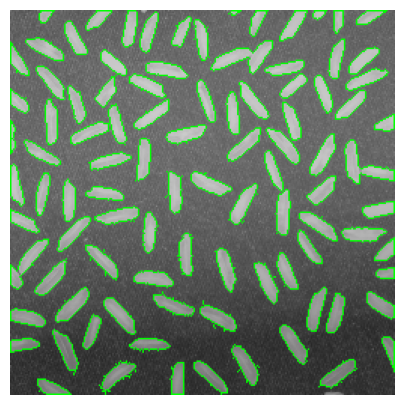

In [5]:
cnts = [rices[c] for c in range(len(rices))]
arroz = cv.drawContours(im.copy(), cnts, -1, color, 1)
view(arroz)

* Cuales son los granos mas similares?

In [6]:
import itertools
nums = rices
r = 2
pool = list(itertools.combinations(nums, r))

least = 10000
el_par = []

In [7]:
for par in pool:
    ret = cv.matchShapes(par[0],par[1],1,0.0)
    if(least > ret):
        least = ret
        el_par = par

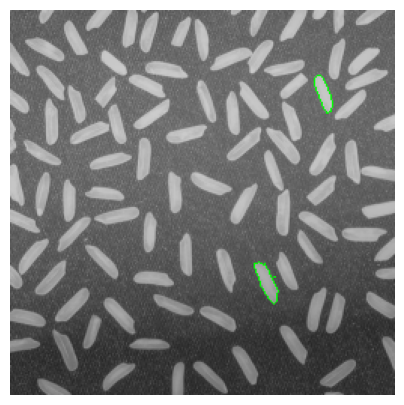

In [8]:
view(cv.drawContours(im.copy(), el_par, -1, color, 1))

* Cual es la orientacion de cada arroz?

In [9]:
angles = []
for i in range(len(rices)):
    angle_specific = cv.fitEllipse(rices[i])
    if(angle_specific[2] <= 90):
        angles.append(90 - angle_specific[2])
    else:
        angles.append(180 - angle_specific[2] + 90)

print(angles)

[151.41368865966797, 85.97411108016968, 135.8878936767578, 39.598785400390625, 36.0063362121582, 119.76982116699219, 179.0257110595703, 6.2934417724609375, 120.53254699707031, 114.31312561035156, 123.64918518066406, 70.98113059997559, 167.26541137695312, 148.52286529541016, 130.77487182617188, 76.05581283569336, 146.51700592041016, 156.4591827392578, 75.76983070373535, 45.62230682373047, 173.4834976196289, 2.0691146850585938, 114.51484680175781, 47.38984680175781, 112.12104797363281, 106.11788940429688, 133.92919921875, 55.09816360473633, 42.566810607910156, 91.11009216308594, 124.54887390136719, 1.00970458984375, 46.08843994140625, 144.80753326416016, 87.03688931465149, 151.6951141357422, 9.830841064453125, 9.976921081542969, 174.28948211669922, 62.01635551452637, 89.33766490221024, 42.70292663574219, 79.14576625823975, 156.84882354736328, 93.0772705078125, 104.82054138183594, 14.576637268066406, 100.99520874023438, 150.05233001708984, 148.38837432861328, 84.33696603775024, 60.8118286

El angulo es:  9.830841064453125


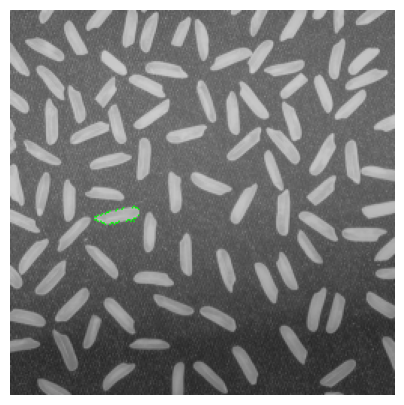

In [10]:
def printer(number):
    print("El angulo es: ", angles[number])
    arroz = cv.drawContours(im.copy(), rices[number], -1, color, 1)
    view(arroz)

printer(36)